In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.visualization import make_lupton_rgb

import scipy.ndimage as ndimage

In [2]:
JDmidI = fits.open("comet_exp_out/p46_johni_t_90_001.fit")[0].header['JD-Helio']
JDmidR = fits.open("comet_exp_out/p46_johnr_t_90_001.fit")[0].header['JD-Helio']
JDmidV = fits.open("comet_exp_out/p46_johnv_t_90_001.fit")[0].header['JD-Helio']

In [3]:
imgI = fits.open("comet_exp_out/p46_johni_t_90_001.fit")[0].data
imgR = fits.open("comet_exp_out/p46_johnr_t_90_001.fit")[0].data
imgV = fits.open("comet_exp_out/p46_johnv_t_90_001.fit")[0].data

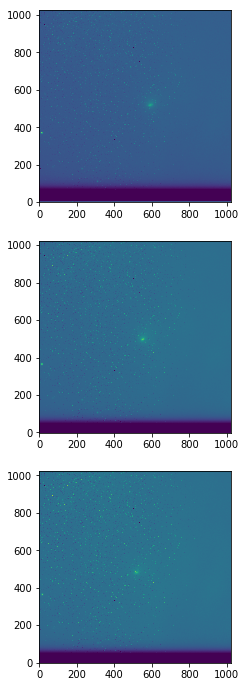

In [4]:
_, ax = plt.subplots(3,1,figsize=(12,12))
ax[0].imshow(imgI,origin='lower')
ax[1].imshow(imgR,origin='lower')
ax[2].imshow(imgV,origin='lower')
plt.show()

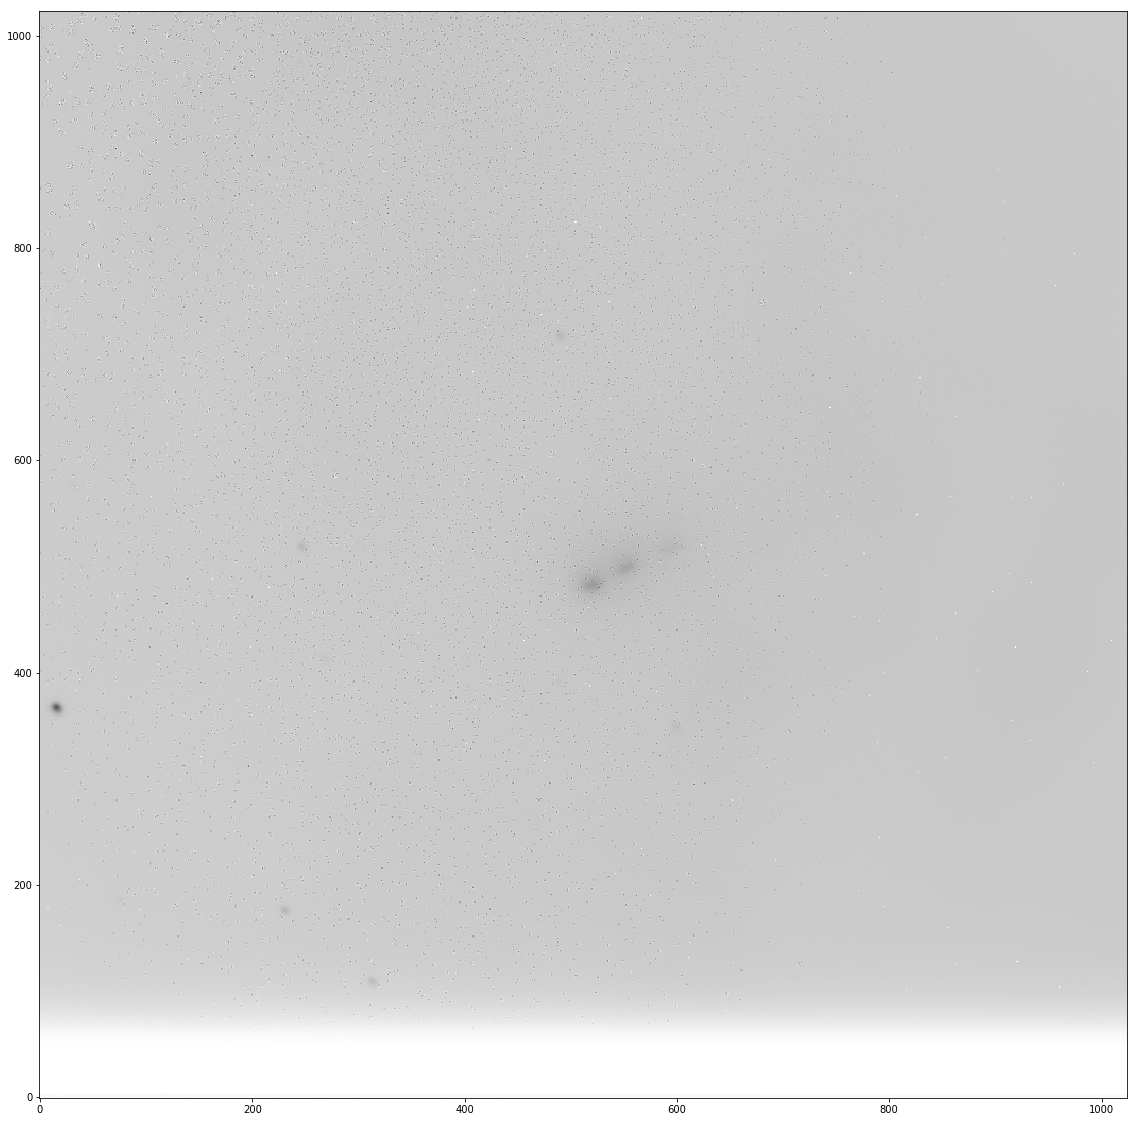

In [5]:
_, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(imgI,origin='lower',alpha=0.5,cmap='Greys')
ax.imshow(imgR,origin='lower',alpha=0.5,cmap='Greys')
ax.imshow(imgV,origin='lower',alpha=0.5,cmap='Greys')
plt.show()

In [7]:
newI = Cutout2D(imgI,[595,515],800)
newR = Cutout2D(imgR,[555,500],800)
newV = Cutout2D(imgV,[520,485],800) 

In [28]:


smoothI = ndimage.gaussian_filter(newI.data, sigma=(2, 2), order=0)
smoothR = ndimage.gaussian_filter(newR.data, sigma=(2, 2), order=0)
smoothV = ndimage.gaussian_filter(newV.data, sigma=(2, 2), order=0)

In [29]:
smoothIn = smoothI/np.max(smoothI)
smoothRn = smoothR/np.max(smoothR)
smoothVn = smoothV/np.max(smoothV)

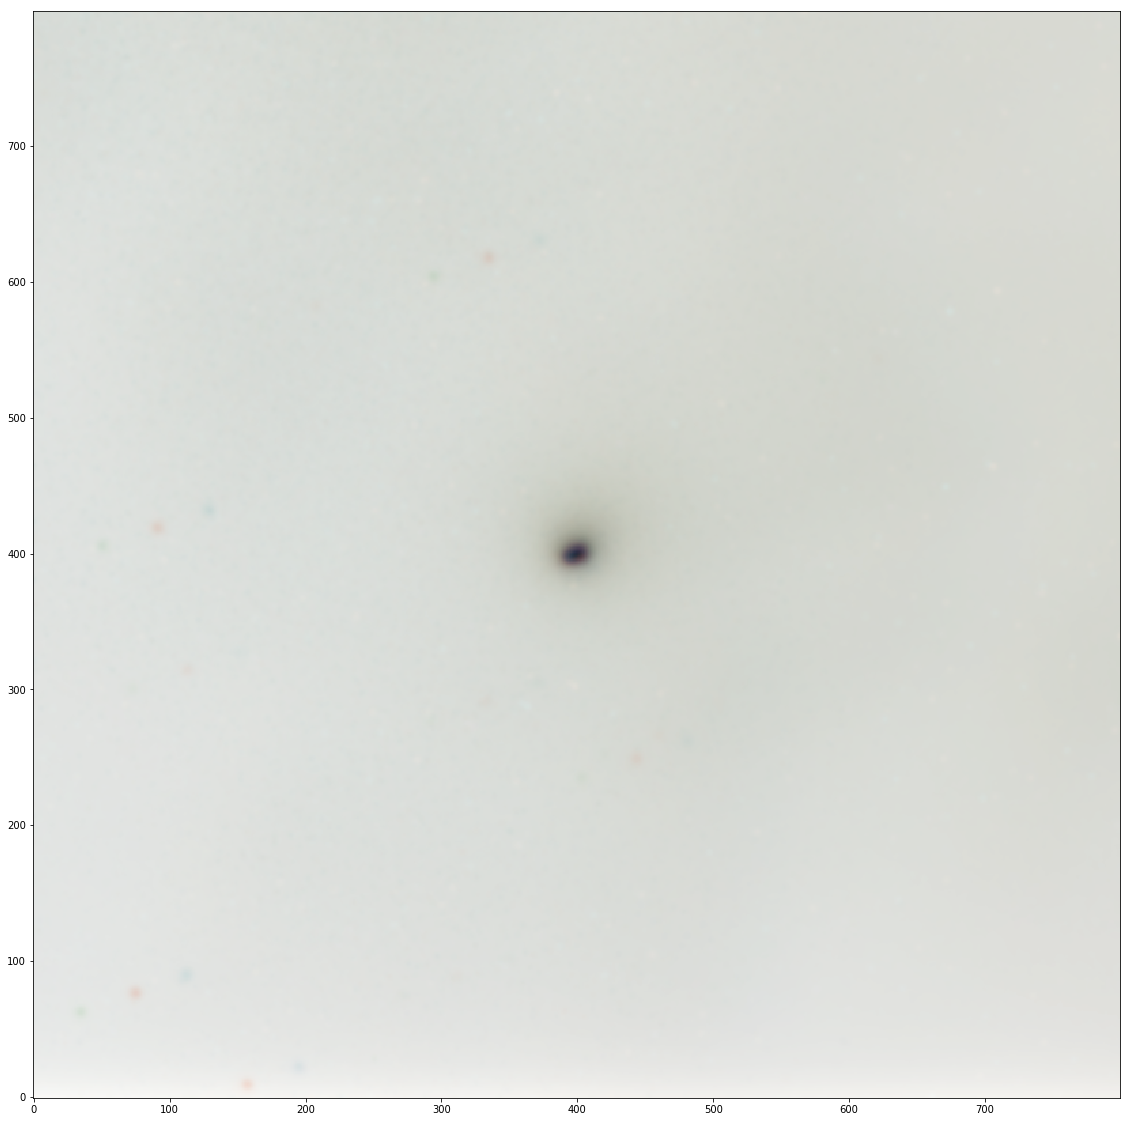

In [31]:
_, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(smoothIn.data,origin='lower',alpha=1,cmap='Greens')
ax.imshow(smoothRn.data,origin='lower',alpha=0.6,cmap='Reds')
ax.imshow(smoothVn.data,origin='lower',alpha=0.4,cmap='Blues')
#plt.savefig("composite_smooth.pdf")
plt.show()

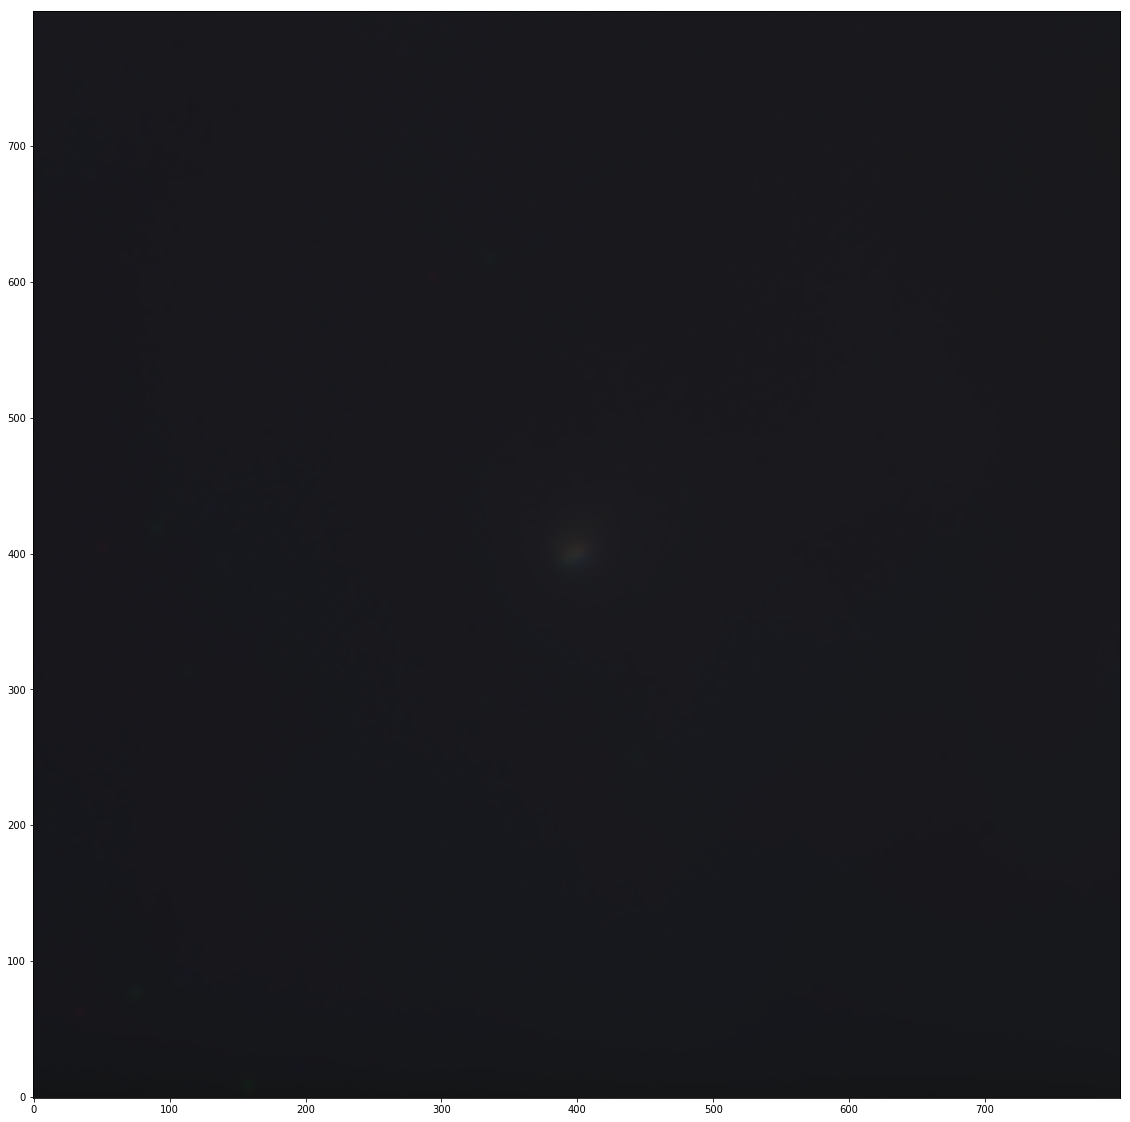

In [35]:

rgb_default = make_lupton_rgb(smoothIn, smoothRn, smoothVn, filename="test.png")
_, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(rgb_default,origin='lower')
plt.show()